# Introduction

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from scipy import stats

from yf_helpers import get_dow_jones_indeces, yf_downloader, yf_reader


## Single Time Series Data

In [2]:
start = "-10y"
end = "2024-11-06"
ticker = "TSLA"
tsla_file = yf_downloader(ticker, start, end)

Data already exists


In [3]:
start_date = "2022-01-01"
end_date = "2024-11-01"
tsla = yf_reader(tsla_file, start_date, end_date).set_index("date")
tsla.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-28,TSLA,262.510010,262.510010,273.540009,262.239990,270.000000,107653600.0
2024-10-29,TSLA,259.519989,259.519989,264.980011,255.509995,264.510010,80521800.0
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0


### Price-Volume Chart

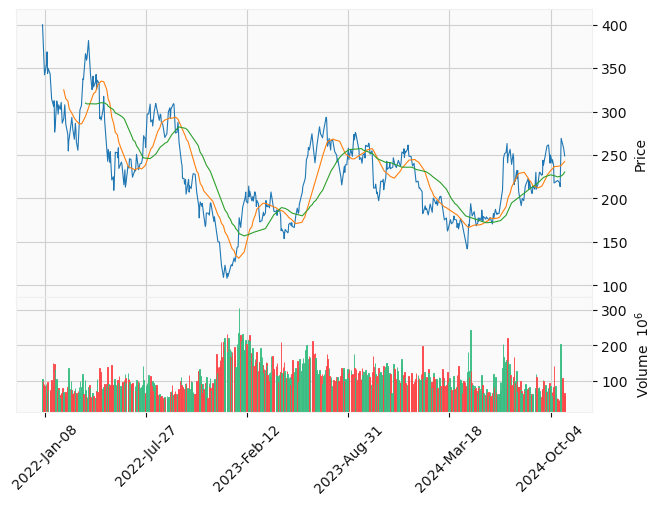

In [4]:
# The top plot consisting of dailing closing prices
mpf.plot(
    tsla, type="line", mav=(30, 60), volume=True, show_nontrading=True, style="yahoo"
)

### Candlestick Chart

In [5]:
tsla_2024 = yf_reader(tsla_file, "2024-07-01", end).set_index("date")
tsla_2024.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0
2024-11-04,TSLA,242.839996,242.839996,248.899994,238.880005,244.559998,68802400.0
2024-11-05,TSLA,251.440002,251.440002,255.279907,246.210098,247.399994,65759459.0


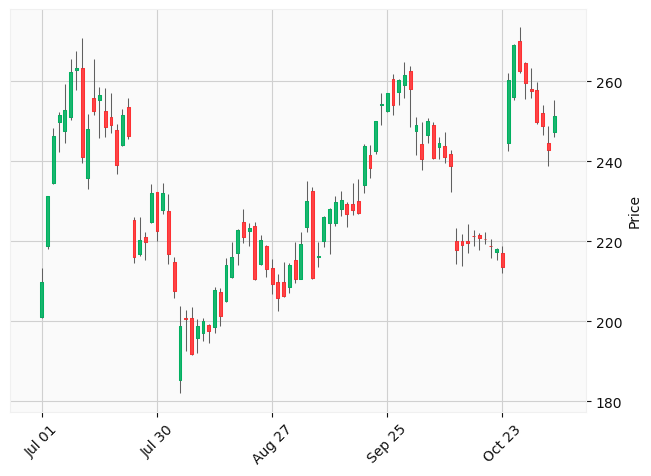

In [6]:
mpf.plot(tsla_2024, type="candle", style="yahoo")

### Plotting Returns

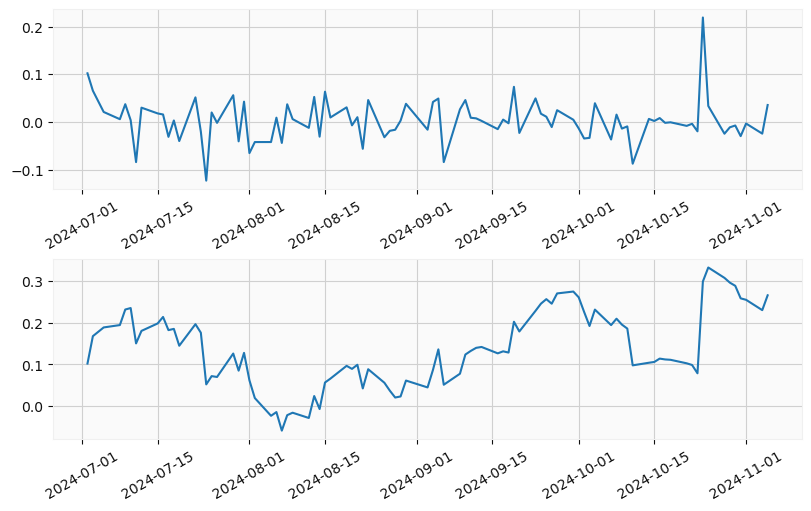

In [7]:
daily_changes = tsla_2024.close.pct_change(periods=1)
_, axes = plt.subplots(2, 1, figsize=(8, 5), constrained_layout=True)
axes[0].plot(daily_changes)
axes[1].plot(daily_changes.cumsum())
for ax in axes:
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(30)

### Plotting Histograms

<Axes: >

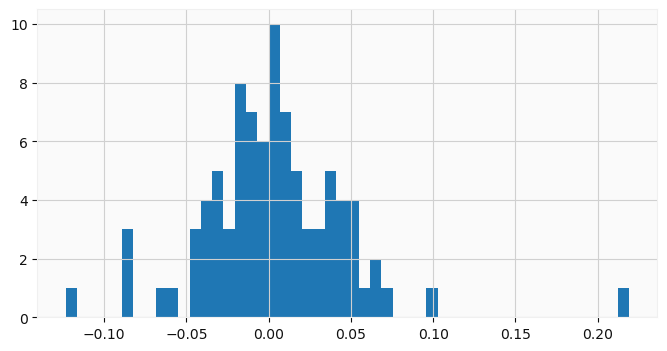

In [8]:
daily_changes.hist(bins=50, figsize=(8, 4))

### Plotting Volatility

<Axes: xlabel='date'>

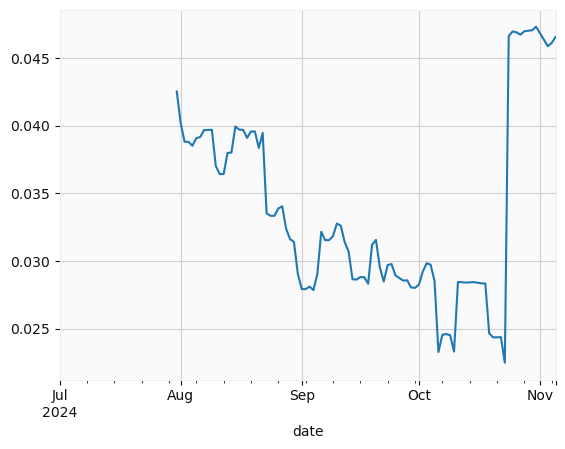

In [9]:
tsla_filled = tsla_2024.asfreq("D", method="ffill")
tsla_returns = tsla_filled.close.pct_change()
tsla_std = tsla_returns.rolling(window=30, min_periods=30).std()
tsla_std.plot()

### Q-Q Plot

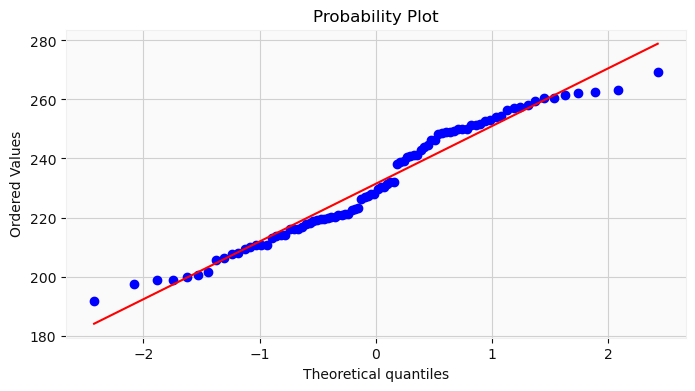

In [10]:
daily_changes = daily_changes.dropna()

_, ax = plt.subplots(figsize=(8, 4))
qq = stats.probplot(tsla_2024.close, dist="norm", plot=ax)

## Multiple Time Series Data

In [11]:
symbols = get_dow_jones_indeces()

In [12]:
symbols_file = yf_downloader(symbols, start="-10y", end=end)
symbols_df = yf_reader(symbols_file, start_date, end_date).set_index("date")
symbols_df.tail()

Data already exists


,symbol,close,high,low,open,volume
date,,,,,,
2024-11-01,TRV,244.616180,247.932303,244.237759,245.552265,1450200.0
2024-11-01,UNH,565.391418,568.150854,561.745430,562.960739,2548300.0
2024-11-01,V,290.188293,292.114654,286.645042,287.942563,5470700.0
2024-11-01,VZ,40.639866,41.612627,40.580909,41.386632,16682400.0
2024-11-01,WMT,82.008308,82.347553,81.359744,82.347553,12181800.0


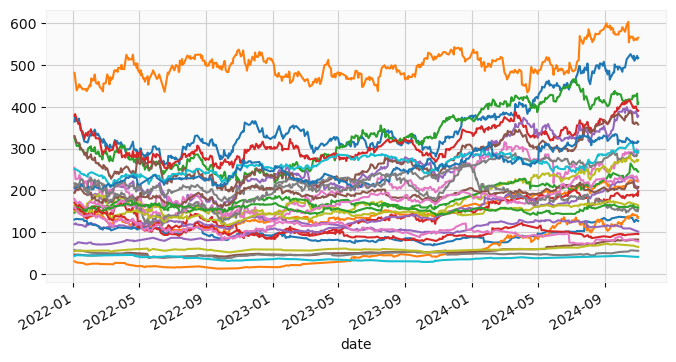

In [13]:
_, ax = plt.subplots(figsize=(8, 4))
for symbol in symbols:
    symbols_df.query(f"symbol == '{symbol}'").close.plot(ax=ax)

### Displaying the Correlation Matrix

In [14]:
corr_df = symbols_df.pivot_table(index="date", columns="symbol", values="close")
corr_df.head()

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,DIS,GS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,179.076599,206.158508,170.404495,161.320602,207.860001,194.347610,254.041077,57.154011,154.847061,364.505890,...,326.287720,158.128067,30.070992,150.336334,329.840485,146.404388,481.041656,216.382202,42.666946,46.203487
2022-01-04,176.803833,207.204361,167.522003,166.499435,213.630005,204.750397,246.851227,55.752239,153.829636,375.708557,...,320.692841,159.779770,29.241367,150.862366,326.533539,149.459366,470.142792,217.388718,43.504993,45.357029
2022-01-05,172.100861,204.748901,164.356995,164.725220,213.070007,206.318314,226.405426,54.869305,153.296249,367.548584,...,308.382111,155.804245,27.558167,151.545303,327.146301,150.183197,468.984009,214.984772,43.952496,45.970303
2022-01-06,169.227921,204.776184,163.253998,166.234695,211.339996,208.421417,227.877213,55.451859,154.985352,365.981140,...,305.945282,154.642273,28.131210,150.271729,324.432648,152.589554,449.791260,214.740479,43.740952,45.842537
2022-01-07,169.395172,206.704178,162.554001,167.657654,215.500000,210.486954,227.041870,55.643013,155.904022,366.515961,...,306.101257,150.733978,27.201759,150.188675,314.375610,156.264969,439.208557,212.014099,44.663200,46.280136


In [15]:
corr_df.pct_change().corr().head()

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,DIS,GS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.226707,0.565642,0.470641,0.393368,0.309677,0.514724,0.472543,0.449181,0.421211,...,0.686539,0.493026,0.563801,0.292841,0.394978,0.197097,0.236043,0.554646,0.187381,0.243896
AMGN,0.226707,1.000000,0.143799,0.213276,0.111231,0.230067,0.120205,0.265069,0.158810,0.260290,...,0.178245,0.161426,0.080042,0.285133,0.225779,0.224042,0.234632,0.225041,0.220134,0.201118
AMZN,0.565642,0.143799,1.000000,0.465604,0.387617,0.277905,0.576212,0.397808,0.489947,0.433154,...,0.685307,0.455411,0.560677,0.145868,0.369633,0.137478,0.109478,0.445980,0.117325,0.255820
AXP,0.470641,0.213276,0.465604,1.000000,0.462294,0.492129,0.413661,0.418303,0.501233,0.610277,...,0.448687,0.423687,0.426209,0.217530,0.421396,0.373338,0.221978,0.577885,0.196159,0.203319
BA,0.393368,0.111231,0.387617,0.462294,1.000000,0.384095,0.336128,0.291679,0.394839,0.451848,...,0.320633,0.383940,0.373686,0.123686,0.314104,0.228465,0.156519,0.332718,0.120206,0.145764


### Plotting Correlations

In [16]:
tesla_t = ["TSLA", "TM"]
start_date, end_date = "2021-01-01", "2024-11-06"
tt_file = yf_downloader(tesla_t, start="-5y", end=end)
tt_df = yf_reader(tt_file, start_date, end_date).set_index("date")
tt_df.tail()

Data already exists


,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0
2024-11-04,TM,172.699997,172.699997,173.889999,172.289993,173.000000,253400.0
2024-11-04,TSLA,242.839996,242.839996,248.899994,238.880005,244.559998,68802400.0
2024-11-05,TM,174.729996,174.729996,174.809998,172.639999,173.009995,351100.0
2024-11-05,TSLA,251.440002,251.440002,255.279999,246.210007,247.339996,66787000.0


In [17]:
tt_df_filled = tt_df.pivot_table(index="date", columns="symbol", values="close").asfreq(
    "D", method="ffill"
)
tt_df_filled.head()

symbol,TM,TSLA
date,,
2021-01-04,153.289993,243.256668
2021-01-05,153.399994,245.036667
2021-01-06,153.529999,251.993332
2021-01-07,152.669998,272.013336
2021-01-08,152.850006,293.339996


<Axes: xlabel='date'>

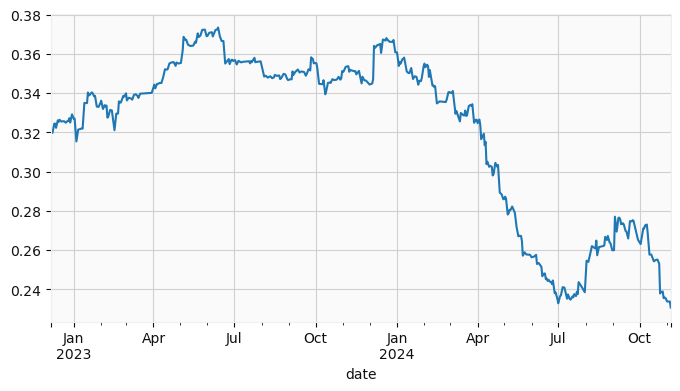

In [18]:
daily_changes = tt_df_filled.pct_change()
tesla_returns = daily_changes["TSLA"]
li_returns = daily_changes["TM"]
window = int(len(tt_df_filled.index) / 2)
df_corrs = (
    tesla_returns.rolling(window=window, min_periods=window)
    .corr(other=li_returns)
    .dropna()
)
df_corrs.plot(figsize=(8, 4))

### Simple Moving Averages

<Axes: xlabel='date'>

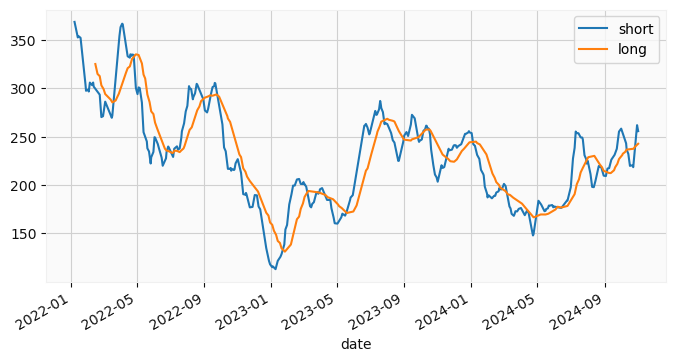

In [19]:
tsla_filled = tsla.asfreq("D", method="ffill")
tsla_last = tsla.close

series_short = tsla_last.rolling(window=5, min_periods=5).mean()
series_long = tsla_last.rolling(window=30, min_periods=30).mean()

tsla_sma = pd.DataFrame(columns=["short", "long"])
tsla_sma["short"] = series_short
tsla_sma["long"] = series_long
tsla_sma.plot(figsize=(8, 4))

### Exponential Moving Average

<Axes: xlabel='date'>

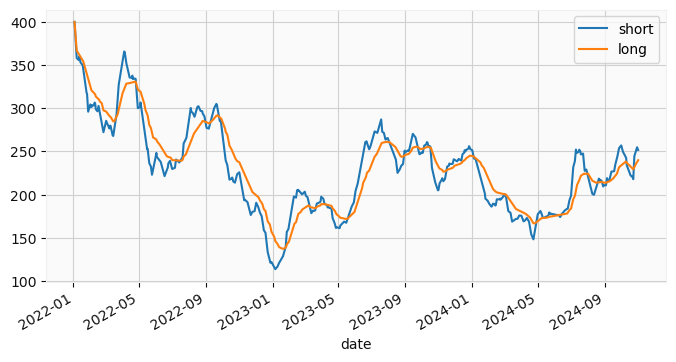

In [20]:
series_short = tsla_last.ewm(span=5).mean()
series_long = tsla_last.ewm(span=30).mean()

tsla_ema = pd.DataFrame(columns=["short", "long"])
tsla_ema["short"] = series_short
tsla_ema["long"] = series_long
tsla_ema.plot(figsize=(8, 4))